# Sybrid Data Modeling

Import Necessary Packages 

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sb
import sklearn as sk
from sklearn import metrics
from sklearn import preprocessing as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string


Read Data Files (Sybrid DME data)

In [2]:
# Health Data 
import pandas as pd
data = pd.read_excel("E:DME.xlsx") #Load Data from CSV
data.head(5)  #Orignal Data Frame 

,Unnamed: 0,FIRST NAME,LAST NAME,Name,ADDRESS,CITY,STATE,ZIP,Zip_code,Zip Groups SCF(Based on 1st 3 zip digits),...,DR PHONE,DR FAX,DR NPI,Gender,race,median_household_income,income-bins,income-classes,income,population
0,0,IRA A WALDMAN,CANCEL,IRA,8736 N OZARK AVE,NILES,IL,607141930,60714,607,...,600773703.0,8.476771e+09,1.154369e+09,M,white,46725,0,2,<=50,29931
1,1,SYLVIA WALDMAN,M,SYLVIA,2466 ORCHARD LAKE RD,SYLVAN LAKE,MI,483200000,48320,483,...,483220000.0,2.488556e+09,1.952393e+09,F,white,51964,1,3,>50,4589
2,2,ALFRED WALDON,CANCEL,ALFRED,905 MARGARET PL NW,ATLANTA,GA,303180000,30318,303,...,301060000.0,6.789452e+09,1.326038e+09,M,white,39421,0,2,<=50,49736
3,3,OLIVA WALDON,AUDIT,OLIVA,7480 TUNNELTON RD,BEDFORD,IN,474210000,47421,474,...,474210000.0,8.122759e+09,1.659365e+09,F,hispanic,41732,0,2,<=50,27831
4,4,WESLEY WALDON,OVER16,WESLEY,122 LAWRENCE STREET,CUTHBERT,GA,398400000,39840,398,...,398400000.0,2.297324e+09,1.245234e+09,M,white,29157,0,2,<=50,5726


In [50]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

FIRST NAME                   4
LAST NAME                    7
Name                         3
ADDRESS                      1
CITY                       247
Geo Coded Coordinates        2
LAST 4                   14470
POLICY NUMBER               52
DR FIRST                  5644
DR LAST                  14470
DR ADDRESS                5655
DR CITY                   5654
DR STATE                  5654
DR ZIP                   13169
DR PHONE                  5654
DR FAX                    5654
DR NPI                    5710
Gender                    5495
dtype: int64

In [51]:
data.shape

(14470, 40)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 40 columns):
Unnamed: 0                                   14470 non-null int64
FIRST NAME                                   14466 non-null object
LAST NAME                                    14463 non-null object
Name                                         14467 non-null object
ADDRESS                                      14469 non-null object
CITY                                         14223 non-null object
STATE                                        14470 non-null object
ZIP                                          14470 non-null int64
Zip_code                                     14470 non-null int64
Zip Groups SCF(Based on 1st 3 zip digits)    14470 non-null int64
Zip_County                                   14470 non-null object
Full Address                                 14470 non-null object
Geo Coded Coordinates                        14468 non-null object
PHONE                   

In [53]:
from sklearn import preprocessing
x = data[['population']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dframe = pd.DataFrame(x_scaled)
data['population_scale'] = dframe

In [54]:
data.head(5)                       

,Unnamed: 0,FIRST NAME,LAST NAME,Name,ADDRESS,CITY,STATE,ZIP,Zip_code,Zip Groups SCF(Based on 1st 3 zip digits),...,DR FAX,DR NPI,Gender,race,median_household_income,income-bins,income-classes,income,population,population_scale
0,0,IRA A WALDMAN,CANCEL,IRA,8736 N OZARK AVE,NILES,IL,607141930,60714,607,...,8.476771e+09,1.154369e+09,M,white,46725,0,2,<=50,29931,0.262273
1,1,SYLVIA WALDMAN,M,SYLVIA,2466 ORCHARD LAKE RD,SYLVAN LAKE,MI,483200000,48320,483,...,2.488556e+09,1.952393e+09,F,white,51964,1,3,>50,4589,0.039669
2,2,ALFRED WALDON,CANCEL,ALFRED,905 MARGARET PL NW,ATLANTA,GA,303180000,30318,303,...,6.789452e+09,1.326038e+09,M,white,39421,0,2,<=50,49736,0.436241
3,3,OLIVA WALDON,AUDIT,OLIVA,7480 TUNNELTON RD,BEDFORD,IN,474210000,47421,474,...,8.122759e+09,1.659365e+09,F,hispanic,41732,0,2,<=50,27831,0.243827
4,4,WESLEY WALDON,OVER16,WESLEY,122 LAWRENCE STREET,CUTHBERT,GA,398400000,39840,398,...,2.297324e+09,1.245234e+09,M,white,29157,0,2,<=50,5726,0.049656


In [55]:
data.describe()

,Unnamed: 0,ZIP,Zip_code,Zip Groups SCF(Based on 1st 3 zip digits),Age,Teen_age,Adult_age,Mid_age,Old_age,LAST 4,DR LAST,DR PHONE,DR FAX,DR NPI,median_household_income,income-bins,income-classes,population,population_scale
count,14470.000000,1.447000e+04,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,0.0,0.0,8.816000e+03,8.816000e+03,8.760000e+03,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000
mean,7234.500000,2.205702e+08,42242.651970,422.068901,76.372840,0.000415,0.006151,0.417208,0.543607,NaN,NaN,4.014906e+08,5.776612e+09,1.499553e+09,46022.579129,0.319212,2.330270,24730.264064,0.216590
std,4177.273533,2.420517e+08,18853.279427,188.537574,14.267087,0.020359,0.078187,0.493115,0.498112,NaN,NaN,1.882833e+08,2.176903e+09,2.889235e+08,16844.531429,0.466187,0.668012,17028.518349,0.149579
min,0.000000,1.001100e+04,10011.000000,100.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.721000e+03,1.111111e+09,1.003014e+09,9420.000000,0.000000,1.000000,73.000000,0.000000
25%,3617.250000,3.497400e+04,31008.000000,310.000000,68.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.012515e+08,4.106353e+09,1.245322e+09,34725.000000,0.000000,2.000000,11128.250000,0.097110
50%,7234.500000,1.784500e+08,38340.000000,383.000000,76.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,3.918300e+08,6.064395e+09,1.497870e+09,42759.000000,0.000000,2.000000,22503.500000,0.197030
75%,10851.750000,3.970425e+08,47861.250000,478.000000,84.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,4.771000e+08,7.574427e+09,1.750370e+09,53745.000000,1.000000,3.000000,35058.000000,0.307309
max,14469.000000,9.613000e+08,99901.000000,999.000000,118.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,9.840553e+08,9.990001e+09,1.992979e+09,202414.000000,1.000000,4.000000,113916.000000,1.000000


In [9]:
# label = LabelEncoder()
# cols = ['Gender']
# for col in cols:
#     data[col] = label.fit_transform(data[col])
    
#data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('Unnamed: 0.1', axis=1)

# f, ax=py.subplots(figsize=(10,8))
# sb.heatmap(data.corr(), annot=True, ax=ax)
# py.title('CORRELATION')

#### Correlation Matrix

In [57]:
import pandas as pd
import numpy as np
df = data[['ZIP','Zip_code','Age','Teen_age','Adult_age','Mid_age','Old_age','race'
,'median_household_income','population','Gender']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ZIP,Zip_code,Age,Teen_age,Adult_age,Mid_age,Old_age,median_household_income,population
ZIP,1,0.313148,-0.183436,-0.00455175,0.0159856,0.16566,-0.106885,-0.0617369,-0.023631
Zip_code,0.313148,1,0.0696738,-0.0107259,0.0138741,-0.0346917,-0.00425704,0.0674379,0.106329
Age,-0.183436,0.0696738,1,-0.0966584,-0.227331,-0.695747,0.537398,0.052562,0.00526336
Teen_age,-0.00455175,-0.0107259,-0.0966584,1,-0.00160226,-0.0172326,-0.0222282,0.00270824,0.00262115
Adult_age,0.0159856,0.0138741,-0.227331,-0.00160226,1,-0.066561,-0.0858566,-0.00746274,0.000581103
Mid_age,0.16566,-0.0346917,-0.695747,-0.0172326,-0.066561,1,-0.923407,-0.0478184,-0.000322323
Old_age,-0.106885,-0.00425704,0.537398,-0.0222282,-0.0858566,-0.923407,1,0.047097,-0.00711207
median_household_income,-0.0617369,0.0674379,0.052562,0.00270824,-0.00746274,-0.0478184,0.047097,1,0.163776
population,-0.023631,0.106329,0.00526336,0.00262115,0.000581103,-0.000322323,-0.00711207,0.163776,1


#### Data Distibution

In [11]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
y0 = df.population
x0 = df.median_household_income

Population = go.Box(
    y=y0,
     name = 'Population',
      marker = dict(
        color = 'rgb(8,81,156)'
    )
)
Median_Household_Income = go.Box(
    y=x0,
    name = 'Median_Household_Income',
      marker = dict(
        color = 'rgb(8,81,156)'
    )
)

layout = go.Layout(
    title='Distibution',
       width=750,
    height=500,
         xaxis=dict(
        title='Features',
          tickmode='linear'),
         yaxis=dict(
        title='')
)

data1 = [Population,Median_Household_Income]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig)
#py.offline.plot(fig, filename='sentimentPolarity w.r.t Date.html')

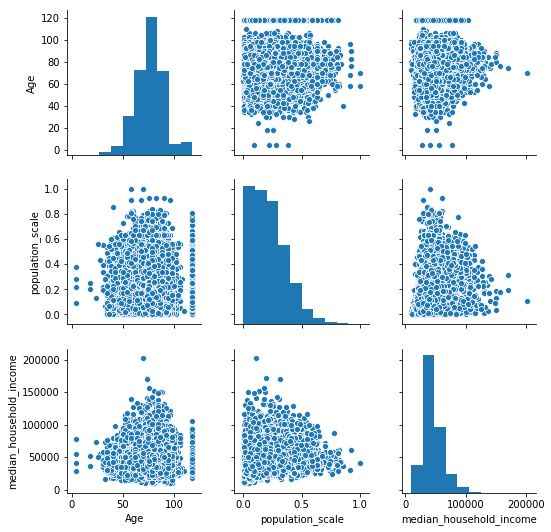

In [12]:
df1  = data[['Age','population_scale','median_household_income']]
g = sns.pairplot(df1)

In [59]:
df_distinct = data#.drop_duplicates(subset='CITY', keep="first")
# df4  = df_distinct[['Age','population_scale','median_household_income']]
# g = sns.pairplot(df4)

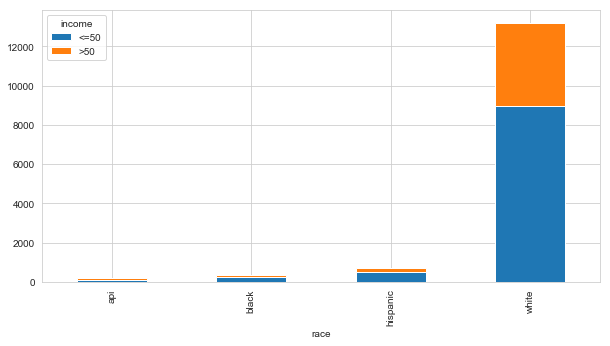

In [60]:
data.groupby(["race", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

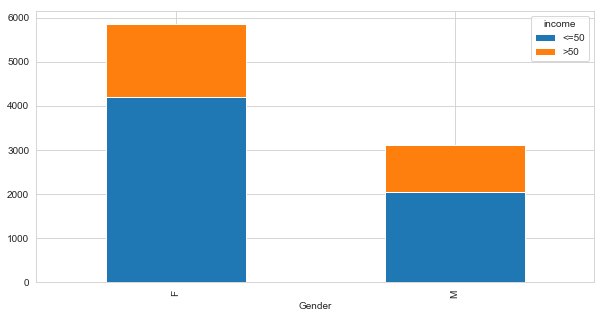

In [61]:
data.groupby(["Gender", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

In [62]:
df_distinct = df_distinct[['CITY','STATE','population_scale','race','Age','Teen_age','Mid_age','Adult_age','Old_age','income-bins']]
df_distinct.head()

,CITY,STATE,population_scale,race,Age,Teen_age,Mid_age,Adult_age,Old_age,income-bins
0,NILES,IL,0.262273,white,72,0,1,0,0,0
1,SYLVAN LAKE,MI,0.039669,white,90,0,0,0,1,1
2,ATLANTA,GA,0.436241,white,72,0,1,0,0,0
3,BEDFORD,IN,0.243827,hispanic,84,0,0,0,1,0
4,CUTHBERT,GA,0.049656,white,62,0,1,0,0,0


In [63]:
#df_distinct[df_distinct['CITY'].str.contains(" < ")]
#df_distinct.dropna()
#df_distinct

In [64]:
label = LabelEncoder()
cols = ['CITY','STATE','race','Age']
for col in cols:
    df_distinct[col] = label.fit_transform(df_distinct[col].fillna('0'))

df_distinct
scaler = pp.StandardScaler()
X=df_distinct.drop('income-bins', axis=1)#.drop(['income','native-country','educational-num'], axis=1)
#X = scaler.fit_transform(X)
Y=df_distinct['income-bins']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.35)#,random_state = 42

In [65]:
#X.shape
df_distinct.head()

,CITY,STATE,population_scale,race,Age,Teen_age,Mid_age,Adult_age,Old_age,income-bins
0,2600,23,0.262273,3,26,0,1,0,0,0
1,3583,35,0.039669,3,36,0,0,0,1,1
2,134,17,0.436241,3,26,0,1,0,0,0
3,233,25,0.243827,2,33,0,0,0,1,0
4,857,17,0.049656,3,21,0,1,0,0,0


In [66]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
param_grid_GBS={"max_depth":[4,5,7,8],"n_estimators":[50,80,100,200,250,300],"learning_rate": [0.01, 0.02, 0.05,0.1]}

In [67]:
#hyper-paremeter for GB
GBestimator=GradientBoostingClassifier(random_state=42)
GB=RandomizedSearchCV(GBestimator,param_grid_GBS,cv=folds)
GB.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
          error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [4, 5, 7, 8], 'n_estimators': [50, 80, 100, 200, 250, 300], 'learning_rate': [0.01, 0.02, 0.05, 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [68]:
GB.score(x_test, y_test)

0.8477788746298124

In [69]:
gbc =GradientBoostingClassifier(n_estimators= 100, max_depth= 7, learning_rate=0.1)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print('F1 GBoost:\n',metrics.f1_score(y_test, y_pred))

F1 GBoost:
 0.627765064836003


In [47]:


# # import machine learning algorithms
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
# for learning_rate in learning_rates:
#     gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
#     gb.fit(x_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))
#     print()

# gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=4, max_depth = 2, random_state = 0)
# gb.fit(x_train, y_train)
# predictions = gb.predict(x_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, predictions))
# print()
# print("Classification Report")
# print(classification_report(y_test, predictions))
    

In [70]:
print('Best score:\n',GB.best_score_)
print('Best Parameters:\n',GB.best_params_)

Best score:
 0.834662413609782
Best Parameters:
 {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.1}


In [71]:
gbc =GradientBoostingClassifier(n_estimators= 100, max_depth= 7, learning_rate=0.1)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print('F1 GBoost:\n',metrics.f1_score(y_test, y_pred))

F1 GBoost:
 0.6201074443591712


In [72]:
rf_model=RandomForestClassifier(n_estimators=400, max_depth=10, max_features='sqrt', min_samples_leaf=3, min_samples_split=5, bootstrap=False)
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
print('F1 Random Forest:\n', metrics.f1_score(y_test, y_pred))

F1 Random Forest:
 0.35332708528584816


In [30]:
#hyper-paremeter 
XGBestimator=xgb.XGBClassifier(random_state=42)
XGB=RandomizedSearchCV(XGBestimator,param_grid_GBS,cv=folds)
XGB.fit(x_train,y_train)

In [31]:
# print('Best score:\n',XGB.best_score_)
# print('Best Parameters:\n',XGB.best_params_)

In [32]:
# xgb1 = xgb.XGBClassifier(max_depth=3, n_estimators=30, learning_rate=0.1)
# xgb1.fit(x_train, y_train)
# y_pred = xgb1.predict(x_test)
# print('F1 XGB score:\n', metrics.f1_score(y_test, y_pred))

In [33]:
# xgb1 = xgb.XGBClassifier(max_depth=7, n_estimators=250, learning_rate=0.1)
# xgb1.fit(x_train, y_train)
# y_pred = xgb1.predict(x_test)
# print('F1 XGB score:\n', metrics.f1_score(y_test, y_pred))

In [34]:
# cm = confusion_matrix(y_test,y_pred)
# print('Confusion matrix: \n',cm)
# print('Classification report: \n',classification_report(y_test,y_pred))

In [35]:
# y_pred_prob = xgb1.predict_proba(x_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# metrics.auc(fpr, tpr)

In [73]:
feature_cols = ['CITY','STATE','population_scale','race','Age','Teen_age','Mid_age','Adult_age','Old_age',]
X = df_distinct[feature_cols] # Features
y = df_distinct['income-bins'] # Target variable

In [74]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [75]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3410,   52],
       [1547,   56]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

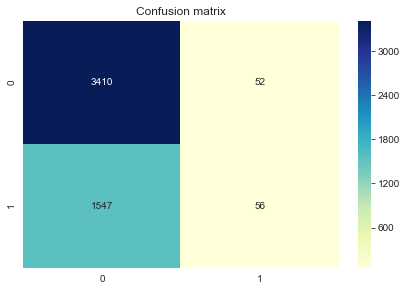

In [76]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6843040473840079
Precision: 0.5185185185185185
Recall: 0.034934497816593885


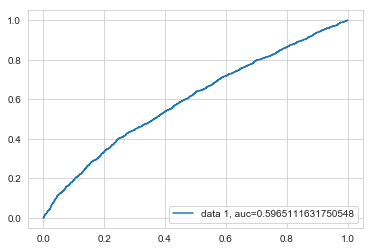

In [78]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

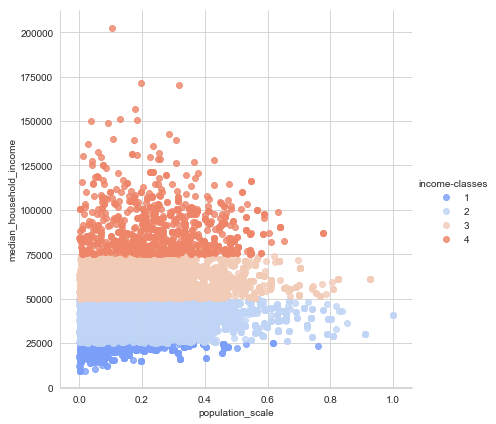

In [80]:
sns.set_style('whitegrid')
sns.lmplot('population_scale','median_household_income',data=data, hue='income-classes',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
